In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars

In [2]:
z2 = {}
z2['redshift'] = 2
z2['label'] = 'z=2'
z2['color'] = 'red'
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    z2['ids'] = f['ids'][:]
    z2['total_mass'] = f['total_mass'][:]
    z2['newbin_current_SFR'] = f['newbin_current_SFR'][:]

z0p7 = {}
z0p7['redshift'] = 0.7
z0p7['label'] = 'z=0.7'
z0p7['color'] = 'green'
with h5py.File('galaxy_population_data_'+str(0.7)+'.hdf5', 'r') as f:
    z0p7['ids'] = f['ids'][:]
    z0p7['halfmass_radius'] = f['halfmass_radius'][:]
    z0p7['total_mass'] = f['total_mass'][:]
    z0p7['newbin_current_SFR'] = f['newbin_current_SFR'][:]

z0 = {}
z0['redshift'] = 0
z0['label'] = 'z=0'
z0['color'] = 'blue'
with h5py.File('galaxy_population_data_'+str(0)+'.hdf5', 'r') as f:
    z0['ids'] = f['ids'][:]
    z0['total_mass'] = f['total_mass'][:]
    z0['newbin_current_SFR'] = f['newbin_current_SFR'][:]


In [3]:
import warnings
warnings.filterwarnings('ignore')

z2['starforming_selection'] = (np.log10(z2['newbin_current_SFR']/10**(z2['total_mass']))>-10.5)
z2['quiescent_selection'] = (np.log10(z2['newbin_current_SFR']/10**(z2['total_mass']))<=-10.5)

z0p7['starforming_selection'] = (np.log10(z0p7['newbin_current_SFR']/10**(z0p7['total_mass']))>-11.2)
z0p7['quiescent_selection'] = (np.log10(z0p7['newbin_current_SFR']/10**(z0p7['total_mass']))<=-11.2)

z0['starforming_selection'] = (np.log10(z0['newbin_current_SFR']/10**(z0['total_mass']))>-11.5)
z0['quiescent_selection'] = (np.log10(z0['newbin_current_SFR']/10**(z0['total_mass']))<=-11.5)

# Median Lines

## all stars

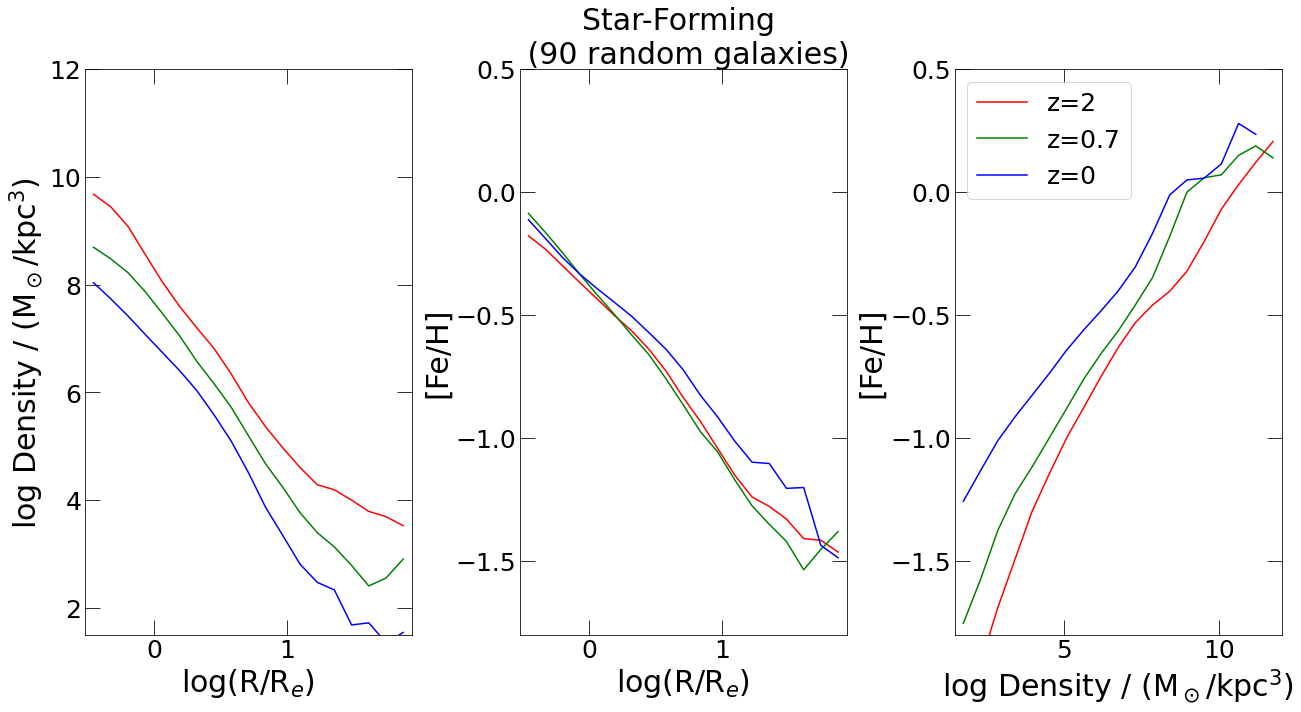

In [37]:
from matplotlib import colors
from scipy import stats

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['starforming_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
        R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax2.set_title('Star-Forming \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

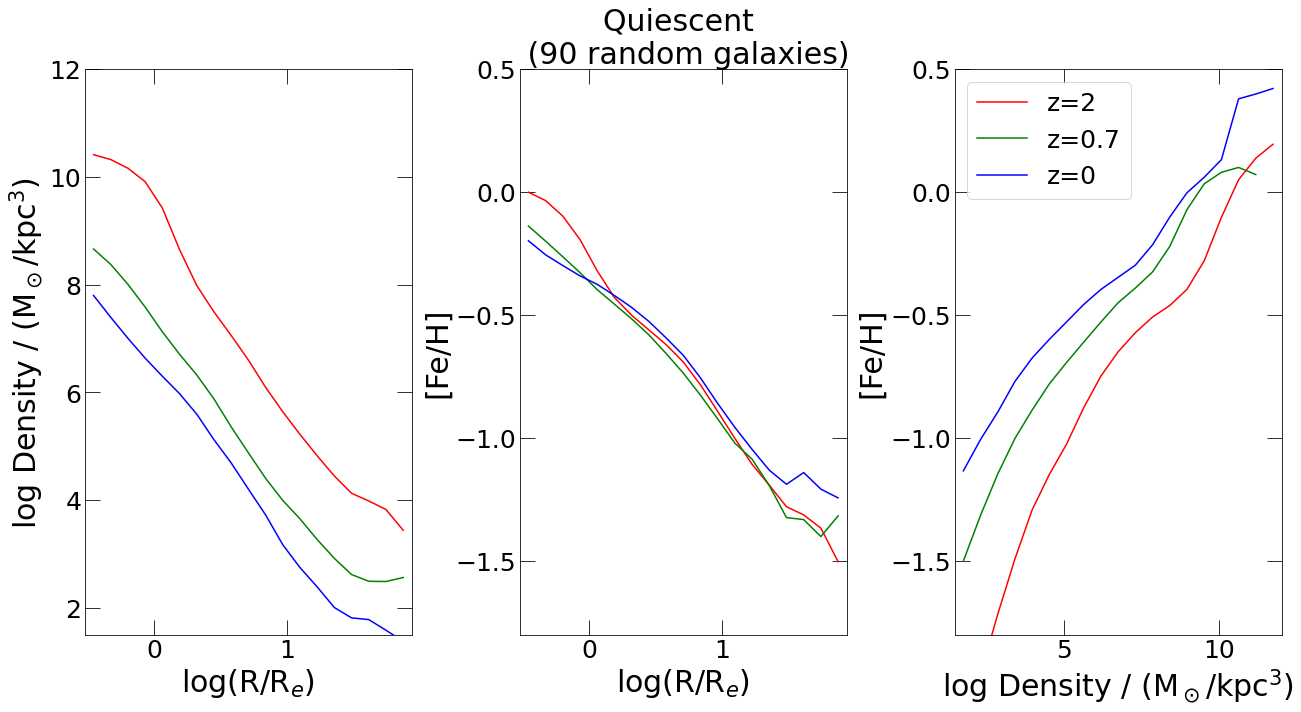

In [38]:
from matplotlib import colors
from scipy import stats

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['quiescent_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
        R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax2.set_title('Quiescent \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

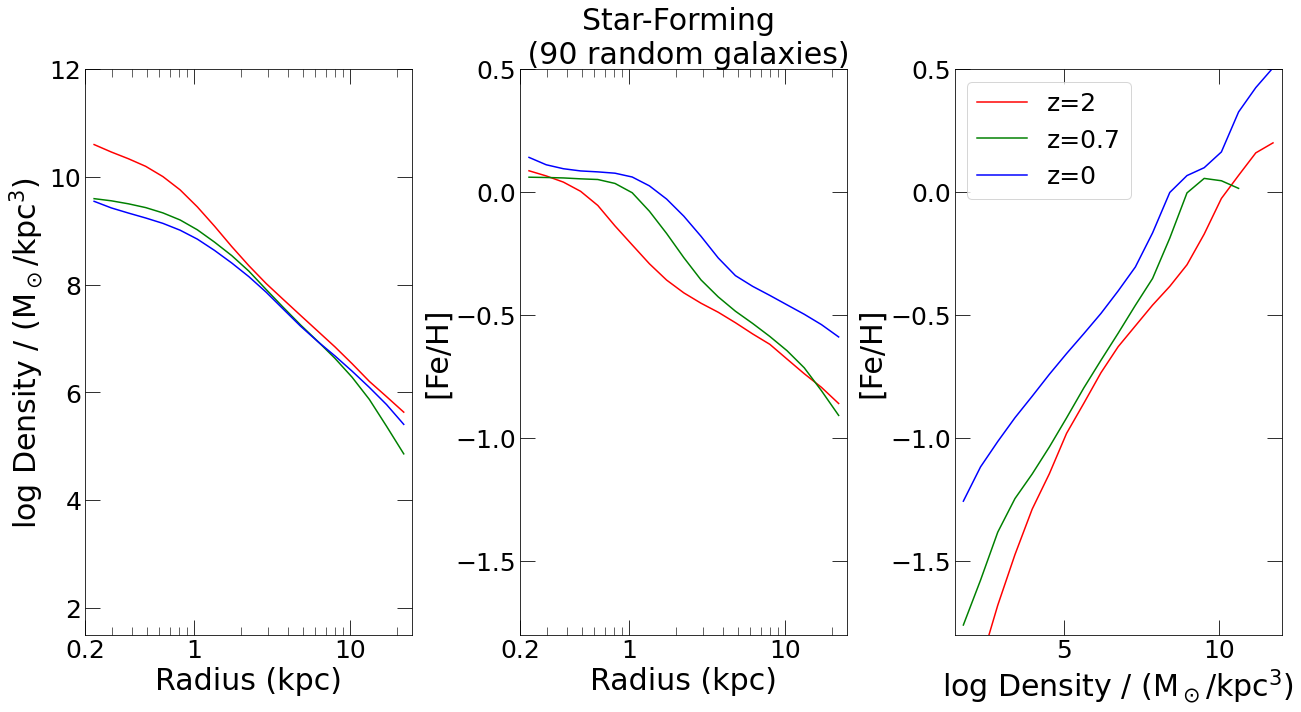

In [5]:
from matplotlib import colors
from scipy import stats

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['starforming_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
#         R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, R), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

ax2.set_title('Star-Forming \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_xscale('log')
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

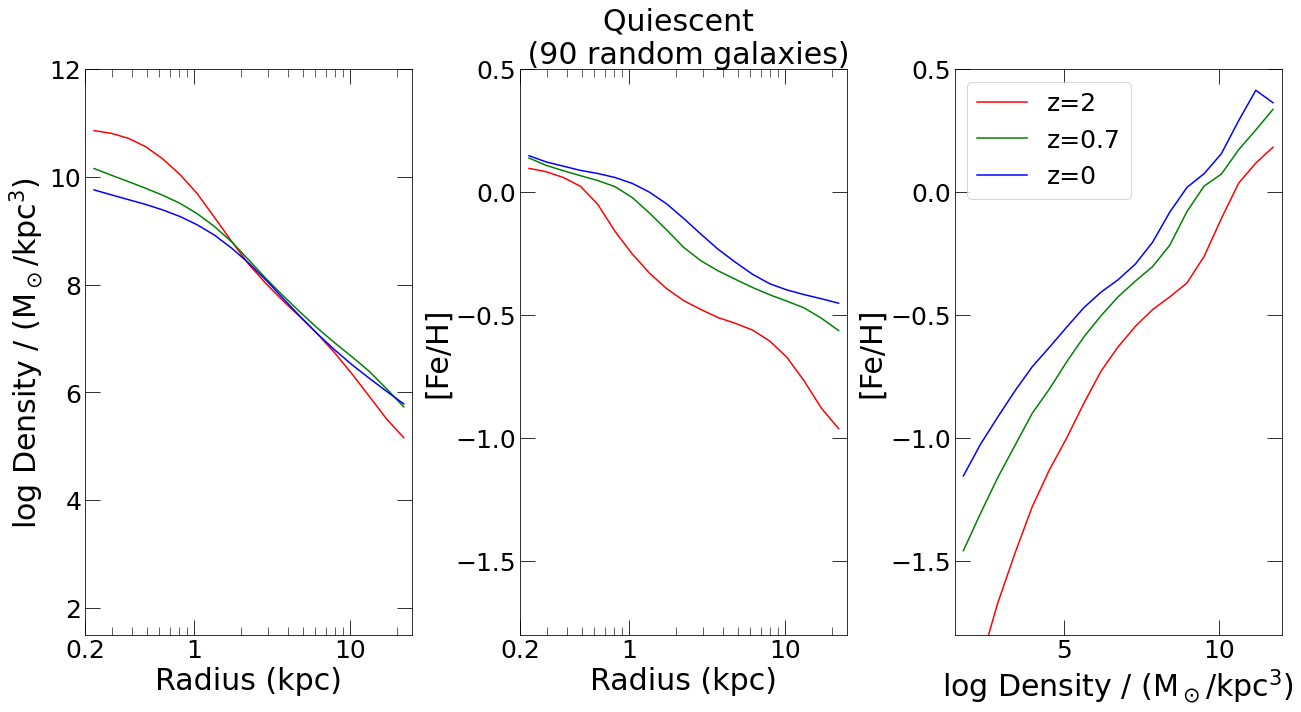

In [6]:
from matplotlib import colors
from scipy import stats

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['quiescent_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
#         R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, R), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

ax2.set_title('Quiescent \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_xscale('log')
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

## young stars

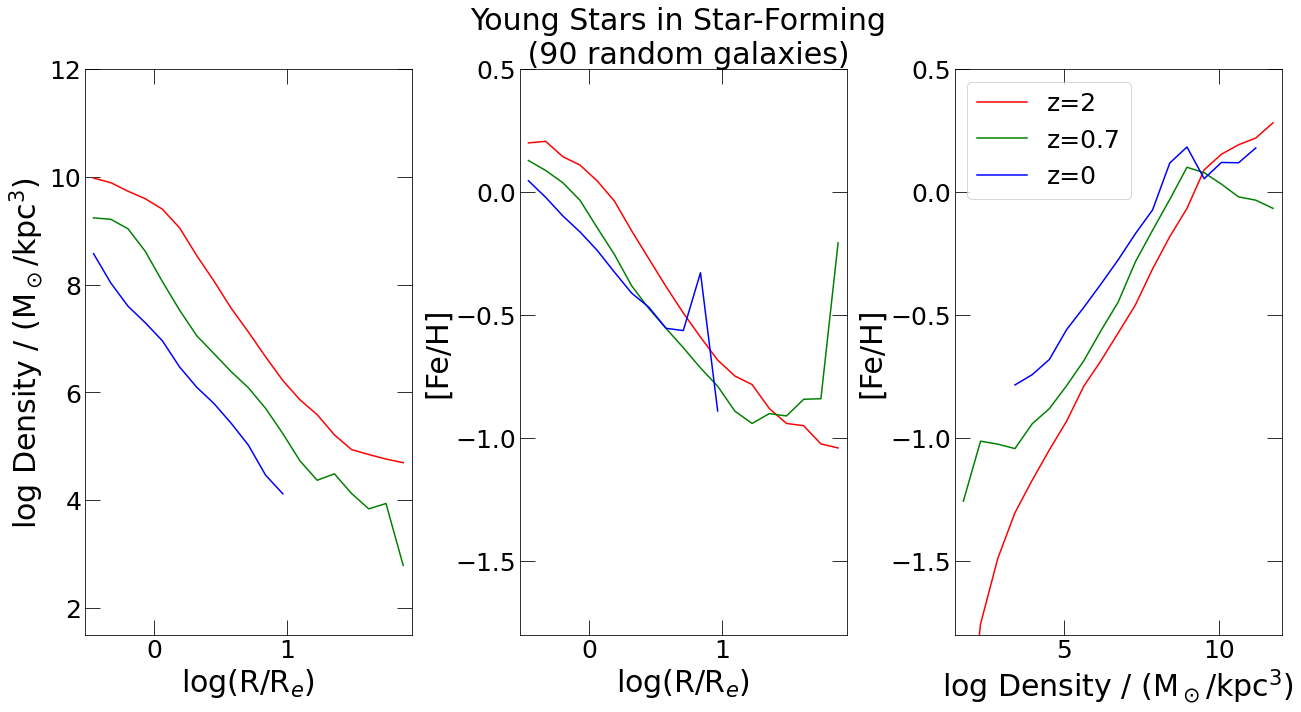

In [6]:
from matplotlib import colors
from scipy import stats
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

starFormationTime = np.linspace(0, 1.0, 2500)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['starforming_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
        R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax2.set_title('Young Stars in Star-Forming \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

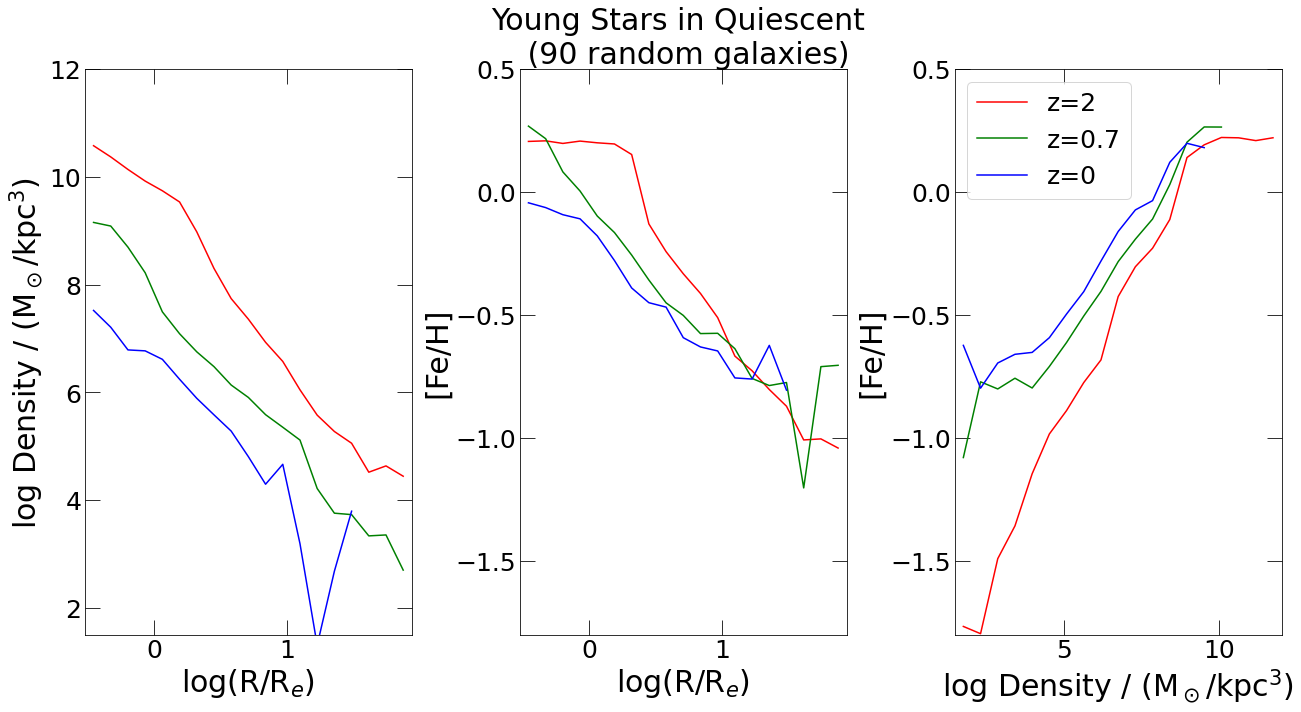

In [7]:
from matplotlib import colors
from scipy import stats
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

starFormationTime = np.linspace(0, 1.0, 2500)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['quiescent_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
        R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax2.set_title('Young Stars in Quiescent \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

In [ ]:
from matplotlib import colors
from scipy import stats
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

starFormationTime = np.linspace(0, 1.0, 2500)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['starforming_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
#         R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, R), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

ax2.set_title('Young Stars in Star-Forming \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax1.set_xlim(0.2, 25)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

In [ ]:
from matplotlib import colors
from scipy import stats
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

starFormationTime = np.linspace(0, 1.0, 2500)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

#z=2 star-forming galaxies
for z in [z2, z0p7, z0]:
    redshift = z['redshift']
    big_density = np.zeros(0)
    big_R = np.zeros(0)
    big_FeH = np.zeros(0)
    for id in np.random.choice(z['ids'][z['quiescent_selection']], 90, replace=False):
        logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
#         R_e = halfmass_rad_stars(id, redshift)
        big_density = np.concatenate((big_density, np.log10(density)), axis=None)
        big_R = np.concatenate((big_R, R), axis=None)
        big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    
    xbins_new = (xbins[1:]+xbins[:-1])/2
    densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
    
    stat1, _, _ = stats.binned_statistic(big_R, big_density, 'median', bins=xbins)
    stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'median', bins=xbins)
    stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'median', bins=densitybins2)
    
    ax1.plot(xbins_new, stat1, c=z['color'], label=z['label'])
    ax2.plot(xbins_new, stat2, c=z['color'], label=z['label'])
    ax3.plot(densitybins2_new, stat3, c=z['color'], label=z['label'])

ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

ax2.set_title('Young Stars in Quiescent \n (90 random galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax1.set_xlim(0.2, 25)
ax1.set_xscale('log')
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.legend(fontsize=ftss)#-2, handletextpad=0.1)

for ax in axes:
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()